In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import lightgbm as lgb
from sklearn.model_selection import KFold
from imblearn.metrics import  geometric_mean_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, f1_score, precision_recall_curve, precision_score 
from sklearn.metrics import recall_score, average_precision_score, auc
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.over_sampling import SMOTE, ADASYN

In [2]:
credit_df = pd.read_csv('../input/credit-fraud/creditfraud.csv',  delimiter=',')

credit_df



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


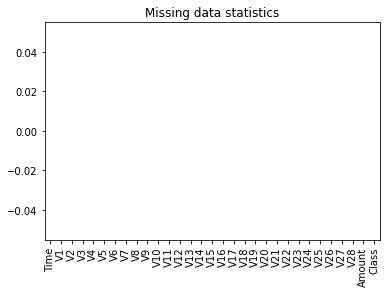

In [4]:
c = credit_df.isnull().sum()
plt.title("Missing data statistics")
c.plot(kind='bar')
print(c)

Count of Non-Fraud Transactions 284315
Count of Fraud Transactions 492


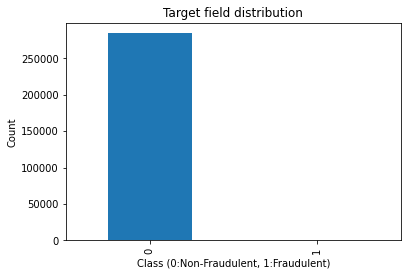

In [5]:
negative, positive = credit_df['Class'].value_counts()
print('Count of Non-Fraud Transactions', negative)
print('Count of Fraud Transactions', positive)
credit_df['Class'].value_counts().plot(kind='bar', title='Target field distribution')

plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = credit_df[['Amount','Time']]

credit_df[['Amount','Time']] = scaler.fit_transform(data)

credit_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


In [7]:
pd.set_option('max_columns', None)

In [8]:
credit_df.groupby(credit_df['Class']).agg(['min', 'max'])

Time                  V1                   V2             \
            min       max       min       max        min        max   
Class                                                                 
0     -1.996583  1.642058 -56.40751  2.454930 -72.715728  18.902453   
1     -1.988034  1.590592 -30.55238  2.132386  -8.402154  22.057729   

              V3                  V4                     V5             \
             min       max       min        max         min        max   
Class                                                                    
0     -48.325589  9.382558 -5.683171  16.875344 -113.743307  34.801666   
1     -31.103685  2.250210 -1.313275  12.114672  -22.105532  11.095089   

              V6                    V7                     V8             \
             min        max        min         max        min        max   
Class                                                                      
0     -26.160506  73.301626 -31.764946  120.589494 -73.216718  18.709255   
1      -6.406267   6.474115 -43.557242    5.802537 -41.044261  20.007208   

              V9                   V10                  V11             \
             min        max        min        max       min        max   
Class                                                                    
0      -6.290730  15.594995 -14.741096  23.745136 -4.797473  10.002190   
1     -13.434066   3.353525 -24.588262   4.031435 -1.702228  12.018913   

             V12                 V13                  V14             \
             min       max       min       max        min        max   
Class                                                                  
0     -15.144988  7.848392 -5.791881  7.126883 -18.392091  10.526766   
1     -18.683715  1.375941 -3.127795  2.815440 -19.214325   3.442422   

            V15                  V16                   V17            \
            min       max        min        max        min       max   
Class                                                                  
0     -4.391307  8.877742 -10.115560  17.315112 -17.098444  9.253526   
1     -4.498945  2.471358 -14.129855   3.139656 -25.162799  6.739384   

            V18                 V19                  V20             \
            min       max       min       max        min        max   
Class                                                                 
0     -5.366660  5.041069 -7.213527  5.591971 -54.497720  39.420904   
1     -9.498746  3.790316 -3.681904  5.228342  -4.128186  11.059004   

             V21                   V22                   V23             \
             min        max        min        max        min        max   
Class                                                                     
0     -34.830382  22.614889 -10.933144  10.503090 -44.807735  22.528412   
1     -22.797604  27.202839  -8.887017   8.361985 -19.254328   5.466230   

            V24                  V25                 V26                  V27  \
            min       max        min       max       min       max        min   
Class                                                                           
0     -2.836627  4.584549 -10.295397  7.519589 -2.604551  3.517346 -22.565679   
1     -2.028024  1.091435  -4.781606  2.208209 -1.152671  2.745261  -7.263482   

                        V28               Amount              
             max        min        max       min         max  
Class                                                         
0      31.612198 -15.430084  33.847808 -0.353229  102.362243  
1       3.052358  -1.869290   1.779364 -0.353229    8.146182

In [9]:
x= credit_df.drop(['Class'], axis=1)

y = credit_df['Class']
x.shape


(284807, 30)

# AIS Algorithm functions

In [10]:
def initilization_of_population_featurebased(size,n_feat):
    population = []
    #chromosome = []
    for j in range(size): 
        chromosome = []    #chromosome type is list
        for i in range(n_feat):
            if i == 0:
                gene = round(random.uniform(-1.988034,1.590592),4)
            elif i == 1:
                gene =round(random.uniform(-30.55238,2.132386),4)
            elif i == 2:
                gene = round(random.uniform(2.132386,-8.402154),4)
            elif i == 3:
                gene = round(random.uniform(-31.103685,2.250210),4)
            elif i == 4:
                gene = round(random.uniform(-1.313275,12.114672),4)
            elif i == 5:
                gene = round(random.uniform(-22.105532,11.095089),4)
            elif i == 6:
                gene = round(random.uniform(-6.406267,6.474115),4)
            elif i == 7:
                gene =round(random.uniform(-43.557242,5.802537),4)
            elif i == 8:
                gene = round(random.uniform(-41.044261,20.007208),4)
            elif i == 9:
                gene = round(random.uniform(-13.434066,3.353525),4)
            elif i == 10:
                gene = round(random.uniform(-24.588262,4.031435),4)
            elif i == 11:
                gene = round(random.uniform(-1.702228,12.018913),4)
            elif i == 12:
                gene = round(random.uniform(-18.683715,1.375941),4)
            elif i == 13:
                gene = round(random.uniform(-3.127795,2.815440),2)
            elif i == 14:
                gene = round(random.uniform(2.815440,-19.214325),4)
            elif i == 15:
                gene = round(random.uniform(-4.498945,2.471358),4)
            elif i == 16:
                gene = round(random.uniform(-14.129855,3.139656),4)
            elif i == 17:
                gene = round(random.uniform(-25.162799,6.739384),4)
            elif i == 18:
                gene = round(random.uniform(-9.498746,3.790316),4)
            elif i == 19:
                gene = round(random.uniform(-3.681904,5.228342),4)
            elif i == 20:
                gene = round(random.uniform(-4.128186,11.059004),4)
            elif i == 21:
                gene = round(random.uniform(-22.797604,27.202839),4)
            elif i == 22:
                gene = round(random.uniform(-8.887017,8.361985),4)
            elif i == 23:
                gene = round(random.uniform(-19.254328,5.466230),4)
            elif i == 24:
                gene = round(random.uniform(-2.028024,1.091435),4)
            elif i == 25:
                gene = round(random.uniform(-4.781606,2.208209),4)
            elif i == 26:
                gene = round(random.uniform(-1.152671,2.745261),4)
            elif i == 27:
                gene = round(random.uniform(-7.263482,3.052358),4)
            elif i == 28:
                gene = round(random.uniform(-1.869290,1.779364),4)
            else:
                gene =  round(random.uniform(-0.353229,8.146182),4)
            chromosome.append(gene)
        population.append(chromosome)
    return(population)

In [11]:
print(initilization_of_population_featurebased(2,30))

[[1.3913, -7.6146, -1.5779, 1.7684, 5.7256, -19.4096, 0.4672, -27.727, 13.6832, -6.3399, -9.076, 0.4071, 0.8838, 2.13, -19.0428, -1.9634, -12.661, -0.336, 1.7203, -1.9063, 4.2838, -12.7536, -7.5502, 4.975, -1.8289, 0.426, -0.7058, 1.6039, -0.1995, 7.2466], [0.0789, -21.4175, -6.2092, -27.6663, 5.9659, 8.349, 6.0877, -10.0957, -10.476, -2.8181, 0.7085, 0.701, -10.1829, 1.88, -8.6985, -1.4522, -6.8068, -13.842, 3.5728, -2.015, 5.6075, 5.1848, 5.4562, -15.0312, -1.4885, -2.6385, -0.309, -6.8421, 0.306, 1.8637]]


In [12]:
def fitness_score(population,model,X_train,X_test, y_train, y_test):
    scores = []
    for chromosome in population:
        a_series = pd.Series(chromosome, index = X_train.columns)
        b_series = pd.Series([1])
        X_train_with_chromosome = X_train.append(a_series, ignore_index=True)
        y_train_with_chromosome = y_train.append(b_series, ignore_index=True)
        model.fit(X_train_with_chromosome,np.ravel(y_train_with_chromosome))
        predictions = model.predict(X_test)
        scores.append(f1_score(np.ravel(y_test), predictions))
    scores, population = np.array(scores), np.array(population) # list of arrays scores = [[array1],[array2]]
    inds = np.argsort(scores) #[2, 3, 1, 0] indicates that the smallest element is at index 2, the next smallest at index 3, then index 1, then index 0.
    return list(scores[inds][::-1]), list(population[inds,:][::-1]) #list of list (converting each array such as array, array2  0 to list in sorted order)

In [13]:
def selection(pop_after_fit,n_parents):
    population_nextgen = [] #New array 
    for i in range(n_parents): 
        population_nextgen.append(pop_after_fit[i])  # append the best chromosomes as parents from results after fit function
    return population_nextgen 

In [14]:
def clone(pop_after_sel, clone_rate):
    population_next_gen_cloned = []
    population_next_gen=pop_after_sel
    for x in range(clone_rate):
            for i in range(len(population_next_gen)):
                clones = population_next_gen[i]
                population_next_gen_cloned.append(clones)
    return population_next_gen_cloned
    

In [15]:
def mutation_clone(pop_after_clone,mutation_rate):
    population_nextgen = []
    for i in range(0,len(pop_after_clone)):  #consider each chromoseome from the cross over set
        chromosome = pop_after_clone[i]  #take in sequence one after other chromosomes
        for j in range(len(chromosome)):  #with the one chromosome array
                chromosome[j] = round(float(chromosome[j] + (mutation_rate)),4)
        population_nextgen.append(chromosome)  #append all the changed ones to next_gen
    
    return population_nextgen

In [16]:
def generations(size,n_feat,n_parents,mutation_rate, clone_rate,model,X_train,X_test, y_train, y_test):
    best_chromo= []
    best_score= []
    stop_condition = True
    i = 0
    fscore_counter = 0
    bestscore_counter = 0
    population_nextgen=initilization_of_population_featurebased(size,n_feat)
    print('Initial random population based on minority class features')
    print(population_nextgen)
    while stop_condition:
        print(i)
        print('--------------------------------------------------------------------------')
        scores, pop_after_fit = fitness_score(population_nextgen, model,X_train,X_test, y_train, y_test)
        print('Scores of each chromosomes in sorted order')
        print(scores)
        print('Chromosome set sorted and corresponding to scores')
        print(pop_after_fit)
        pop_after_sel = selection(pop_after_fit,n_parents)
        print('Selects the best parents to generate better chromosomes for next generation')
        print(pop_after_sel)
        print("Clone after selection based on clone_rate")
        pop_after_clone = clone(pop_after_sel, clone_rate)
        print(pop_after_clone)
        print('Mutate the cloned population')
        population_nextgen = mutation_clone(pop_after_clone,mutation_rate)
        print(population_nextgen)
        if i > 0:
             if round(best_score[-1],2) >= round(scores[0],2):
                    print("Checking if the values are degrading or equal")
                    fscore_counter = fscore_counter + 1
                    print(fscore_counter)
                    if fscore_counter == 2 :
                        print("&&&&&&&&&--------Fscore_counter is checked and near to 10--------&&&&&&&&&&&&&")
                        stop_condition = False
                        
             elif stop_condition == True:
                if round(best_score[-1],2) < round(scores[0],2):
                    print("&&&&&&&&&&&&&&-----Fscore_counter is recompiled to O-------&&&&&&&&&&&&&&&&&")
                    fscore_counter = 0
             if stop_condition == True:
                if len(best_score) > 10:
                    print("-----Length of best score is exceeded so stopping the AIS now--------")
                    stop_condition = False
             #else:
               # stop_condition = True
                    
        i = i + 1
        
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
        print('best score and chromosome')
        print(best_chromo)
        print(best_score)
        
    return best_chromo, best_score

In [17]:
def update_AIS_GeneratedSample_in_TrainSet(chromo,Initial_X_train,Initial_y_train):
    X_train = Initial_X_train
    y_train = Initial_y_train
    for best_chromo in chromo:
        X_train_bestchromo = []
        a_series = pd.Series(best_chromo, index = X_train.columns)
        b_series = pd.Series([1])
        X_train_bestchromo = X_train.append(a_series, ignore_index=True)
        X_train = X_train_bestchromo
        y_train_bestchromo = y_train.append(b_series)
        y_train = y_train_bestchromo
    return X_train, y_train

In [18]:
def modelling_using_AIS_SampledTrainset(AIS_X_train, AIS_y_train, AIS_X_test, AIS_y_test,classifier):
    model = classifier
    model.fit(AIS_X_train,np.ravel(AIS_y_train))
    predictions = model.predict(AIS_X_test)
    acc, recal, precis, aucroc, gmean, _val = evaluation(predictions, AIS_y_test)
    
    return acc, recal, precis, aucroc, gmean, _val
    
    

In [19]:
def evaluation(pred_values, y_test):
    
    acc = accuracy_score(np.ravel(y_test), pred_values)
    recal = recall_score(np.ravel(y_test), pred_values)
    precis = precision_score(np.ravel(y_test), pred_values)
    #val = f1_score(y_test, pred_values)
    aucroc = roc_auc_score(np.ravel(y_test), pred_values)
    _val = f1_score(np.ravel(y_test), pred_values)
    gmean = geometric_mean_score(np.ravel(y_test), pred_values)
    
    return acc, recal, precis, aucroc, gmean, _val

# AIS algorithm on Train and Test datasets function

In [20]:
def AIS_sampling_and_modelling(x,y,model,size,n_feat,n_parents,mutation_rate,clone_rate,foldvalue):
    kf = KFold(n_splits=foldvalue, shuffle = True, random_state=1)
    k = foldvalue
    acc_score = []
    recal_score = []
    pres_score = []
    _fscore = []
    aucroc_score = []
    gmean_score = []
    classifier = model
    for train_index , test_index in kf.split(x):
        print('--------------------------*****START OF FOLD*******--------------------------------------')
        X_train , X_test = x.iloc[train_index,:],x.iloc[test_index,:]
        y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
        Initial_X_train = X_train
        Initial_y_train = y_train
        print('Population generation using {0} Classifier'.format(model))
        print('------------------******AIS STARTED****---------------------------------------------')
        chromo,score=generations(size=size,n_feat=n_feat,n_parents=n_parents,mutation_rate=mutation_rate,clone_rate=clone_rate,
                     model = model,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test)
        print('-----------------------***AIS ENDED****---------------------------------------------')
        X_train_AISsampled, y_train_AISsampled = update_AIS_GeneratedSample_in_TrainSet(chromo,Initial_X_train,Initial_y_train)
        print('-------------------******METRICS CALCULATION FOR THIS FOLD STARTED*****--------------')
        acc, recal, precis, aucroc, gmean, _val = modelling_using_AIS_SampledTrainset(X_train_AISsampled, y_train_AISsampled, X_test, y_test, model)
        acc_score.append(acc)
        recal_score.append(recal)
        pres_score.append(precis)
        _fscore.append(_val)
        aucroc_score.append(aucroc)
        gmean_score.append(gmean)
        print('-------------*******CALCULATED METRICS FOR THIS FOLD***--------------')
        print('-----------------------****END OF FOLD*****------------------------------------------------')                  
    avg_acc_score = sum(acc_score)/k
    avg_recal_score = sum(recal_score)/k
    avg_precis_score = sum(pres_score)/k
    avg_f_score = sum(_fscore)/k
    avg_auc_score = sum(aucroc_score)/k
    avg_gmean_score = sum(gmean_score)/k
    print('Metrics for each fold of {0} using AIS algorithm'.format(classifier))
    print('Accuracy : {0}'.format(acc_score))
    print('Avg accuracy : {}'.format(avg_acc_score))
    print('Recall : {0}'.format(recal_score))
    print('Avg recall : {}'.format(avg_recal_score))
    print('Precision : {0}'.format(pres_score))
    print('Avg precision : {}'.format(avg_precis_score))
    print('F1_score : {0}'.format(_fscore))
    print('Avg f-score : {}'.format(avg_f_score))
    print('AUC_ROC : {0}'.format(aucroc_score))
    print('Avg AUC_ROC : {}'.format(avg_auc_score))
    print('Geometric mean : {0}'.format(gmean_score))
    print('Avg gmean : {}'.format(avg_gmean_score))
        

In [21]:
def AIS_with_resampling(x,y,model,sampler,size,n_feat,n_parents,mutation_rate,clone_rate,foldvalue):
    kf = KFold(n_splits=foldvalue, shuffle = True, random_state=1)
    k = foldvalue
    acc_score = []
    recal_score = []
    pres_score = []
    _fscore = []
    aucroc_score = []
    gmean_score = []
    classifier = model
    sampleclassifier = sampler
    for train_index , test_index in kf.split(x):
        print('--------------------------*****START OF FOLD*******--------------------------------------')
        X_train , X_test = x.iloc[train_index,:],x.iloc[test_index,:]
        y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
        Initial_X_train = X_train
        Initial_y_train = y_train
        print('Population generation using {0} Classifier'.format(model))
        print('------------------******AIS STARTED****---------------------------------------------')
        chromo,score=generations(size=size,n_feat=n_feat,n_parents=n_parents,mutation_rate=mutation_rate,clone_rate=clone_rate,
                     model = model,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test)
        print('-----------------------***AIS ENDED****---------------------------------------------')
        X_train_AISsampled, y_train_AISsampled = update_AIS_GeneratedSample_in_TrainSet(chromo,Initial_X_train,Initial_y_train)
        print('----------------*****Applying sampling {0} technique on updated AIS train datasets******----------'.format(sampleclassifier))
        AIS_X_train_sampled, AIS_y_train_sampled = sampleclassifier.fit_resample(X_train_AISsampled, np.ravel(y_train_AISsampled))
        print('-------------------******METRICS CALCULATION FOR THIS FOLD STARTED*****--------------')
        acc, recal, precis, aucroc, gmean, _val = modelling_using_AIS_SampledTrainset(AIS_X_train_sampled, AIS_y_train_sampled, X_test, y_test, model)
        acc_score.append(acc)
        recal_score.append(recal)
        pres_score.append(precis)
        _fscore.append(_val)
        aucroc_score.append(aucroc)
        gmean_score.append(gmean)
        print('-------------*******CALCULATED METRICS FOR THIS FOLD***--------------')
        print('-----------------------****END OF FOLD*****------------------------------------------------')                  
    avg_acc_score = sum(acc_score)/k
    avg_recal_score = sum(recal_score)/k
    avg_precis_score = sum(pres_score)/k
    avg_f_score = sum(_fscore)/k
    avg_auc_score = sum(aucroc_score)/k
    avg_gmean_score = sum(gmean_score)/k
    print('Metrics for each fold of {0} using AIS algorithm'.format(classifier))
    print('Accuracy : {0}'.format(acc_score))
    print('Avg accuracy : {}'.format(avg_acc_score))
    print('Recall : {0}'.format(recal_score))
    print('Avg recall : {}'.format(avg_recal_score))
    print('Precision : {0}'.format(pres_score))
    print('Avg precision : {}'.format(avg_precis_score))
    print('F1_score : {0}'.format(_fscore))
    print('Avg f-score : {}'.format(avg_f_score))
    print('AUC_ROC : {0}'.format(aucroc_score))
    print('Avg AUC_ROC : {}'.format(avg_auc_score))
    print('Geometric mean : {0}'.format(gmean_score))
    print('Avg gmean : {}'.format(avg_gmean_score))
        

# Random Forest with AIS

In [22]:
RandomForestModel = RandomForestClassifier(random_state = 24)
random.seed(1)

AIS_sampling_and_modelling(x,y,model = RandomForestModel,size = 4,n_feat =x.shape[1] ,n_parents = 2,mutation_rate = 0.10,
                           clone_rate = 2,foldvalue = 5)

--------------------------*****START OF FOLD*******--------------------------------------
Population generation using RandomForestClassifier(random_state=24) Classifier
------------------******AIS STARTED****---------------------------------------------
Initial random population based on minority class features
[[-1.5072, -2.8542, -5.9136, -22.5961, 5.3394, -7.1821, 1.9865, -4.626, -35.314, -12.9582, -0.6689, 4.2358, -3.3926, -3.12, -6.9963, 0.5304, -10.1792, 4.9934, 2.4804, -3.4093, -3.7417, 4.2733, 7.3124, -9.8307, -1.3524, -1.8311, -1.0395, -4.9765, -0.2716, 3.8609], [-1.1539, -23.0066, -0.1724, -15.7741, 2.5779, -21.3921, 4.3821, -16.0908, -1.8312, -10.3131, 3.818, 10.0972, -16.2587, -1.15, -13.0787, 0.4583, 2.042, -11.6967, 1.5316, 2.2907, 0.4791, 6.5817, 6.3349, 1.6641, -0.4518, -0.6646, -1.0181, -4.7594, 1.0402, 3.1682], [-1.3689, -12.615, -5.2738, -8.607, 3.7182, -7.5317, 0.1425, -5.1335, -9.2402, -6.8323, -10.5734, -1.2964, -17.8114, 1.05, -18.844, -0.3643, -7.3326, -19.7283, 